# Regresión logística
---


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "data/Social_Network_Ads.csv"
df = pd.read_csv(path)
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [3]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


 #### Visualización

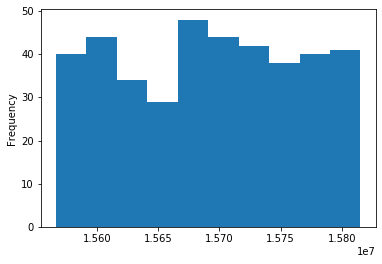

In [3]:
df["User ID"].plot(kind="hist");

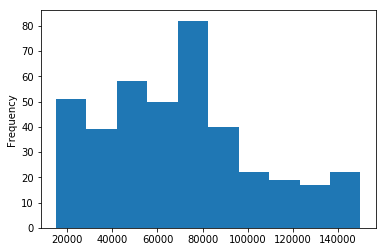

In [5]:
df["EstimatedSalary"].plot(kind="hist");

#### Codificamos el género ya que es una categoria y estas no pueden ser procesadas

In [6]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
x = (df.Gender.values) 
enc.fit(x)

z = enc.transform(x)
df.Gender = z
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [7]:
test = 2  # Tenemos diferentes valores de test para probar diferentes configuraciones

# test = 0 No escalamos las features 
# test = 1 Escalamos las features
# test = 2 Eliminamos columna y escalamos las features

####  Separación entre conjuntos de entrenamiento y test

In [8]:
from sklearn.model_selection import train_test_split

if test == 2:
    
    df = df.drop(["Gender"], axis= 1)

df_train, df_test = train_test_split(df, test_size=0.2, random_state=33)


X_train = df_train.drop(["Purchased"], axis=1)
y_train = df_train.Purchased

X_test = df_test.drop(["Purchased"], axis=1)
y_test = df_test.Purchased

print("Entrenamiento: " + str(df_train.shape[0]))
print("Test: " + str(df_test.shape[0]))
X_train.head()

Entrenamiento: 320
Test: 80


,User ID,Age,EstimatedSalary
335,15601550,36,54000
359,15709183,42,54000
288,15649668,41,79000
35,15713144,35,27000
278,15613014,52,38000


#### Escalamos las columnas

In [9]:
from sklearn.preprocessing import StandardScaler

if test != 0:
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

#### Cargamos la libreria de sklearn que permite entrenar una regresión logística.
[Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
Instanciamos el modelo bajo el nombre `clf_lr`

In [10]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(solver="liblinear", random_state= 33) # Esta sentencia nos crea un clasificador logístico

#### Entrenamos el modelo y lo evaluamos

In [11]:
# Esta sentencia entrena el clasificador con nuestro conjunto de entrenamiento
clf_lr.fit(X_train, y_train)
# Como resultado vemos los diferentes parámetreos del método
# Vamos a comentar: C, random_state

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=33, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
clf_lr.score(X_test, y_test)

0.85

#### Experimentamos con diferentes valores de C

In [13]:
c_estudiar = [0.0000001, 0.25, 0.5, 1.0, 2.0, 5.0, 10.0]

for c in c_estudiar:
    
    clf_lr = LogisticRegression(C=c, solver="liblinear", random_state= 33) 
    clf_lr.fit(X_train, y_train)
    score = clf_lr.score(X_test, y_test)
    print("C = %f, score = %f"%(c, score))

C = 0.000000, score = 0.837500
C = 0.250000, score = 0.850000
C = 0.500000, score = 0.850000
C = 1.000000, score = 0.850000
C = 2.000000, score = 0.862500
C = 5.000000, score = 0.862500
C = 10.000000, score = 0.862500


#### Análisis de resultados

He realizado diferentes experimentaciones para poder tener una idea de la influencia de las distintas operaciones de procesado. 

Resumo los resultados a continuación:



|         Características          | Mejor Resultado |
|:--------------------------------:|-----------------|
| Todas, sin escalar               | 0.78            |
| **Todas, escaladas**             | 0.875           |
| Escaladas sin Age                |  0.7625         |
| Escaladas sin USER ID            | 0.875           |
| Escaladas sin Gender             | 0.8625          |
|*Escaladas, sin Estimated Salary* | 0.78            |


Podemos obtener varias conclusiones de este análisis:

1. El escalado es necesario.
2. USER ID no molesta, pero no es neceario.
3. Parece que Estimated Salary es la característica mas influyente.
4. El problema es sencillo ya que obtenemos resultados *satisfactorios* con poco esfuerzo.
5. La parametrización del método no parece tener una gran influencia.